# Import Libraries and Data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
warnings.simplefilter("ignore")

In [2]:
customer = pd.read_csv('/kaggle/input/retail-fashion-data/customer_data.csv')
product = pd.read_csv('/kaggle/input/retail-fashion-data/product_data.csv')
sales = pd.read_csv('/kaggle/input/retail-fashion-data/sales_data.csv')
store = pd.read_csv('/kaggle/input/retail-fashion-data/store_data.csv')

# Data Summary

In [3]:
def check(df):
    """
    Generates a concise summary of DataFrame columns.
    """
    # Compute values that are constant across columns
    total_rows = len(df)
    duplicates = df.duplicated().sum()

    # Use vectorized operations 
    dtypes = df.dtypes
    instances = df.count()
    unique = df.nunique()
    sum_null = df.isnull().sum()

    # Create the summary 
    df_check = pd.DataFrame({
        'column': df.columns,
        'dtype': dtypes,
        'instances': instances,
        'unique': unique,
        'sum_null': sum_null,
        'duplicates': duplicates  
    })

    return df_check

print("Customer Data")
display(check(customer))
display(customer.head())

print("Product Data")
display(check(product))
display(product.head())

print("Sales Data")
display(check(sales))
display(sales.head())

print("Store Data")
display(check(store))
display(store.head())

Customer Data


,column,dtype,instances,unique,sum_null,duplicates
customer_id,customer_id,object,2500,2500,0,0
age,age,int64,2500,54,0,0
gender,gender,object,2500,4,0,0
city,city,object,2500,5,0,0
email,email,object,2450,2450,50,0


,customer_id,age,gender,city,email
0,C00001,20,Female,Faro,user1@example.com
1,C00002,35,Male,Porto,user2@example.com
2,C00003,53,Other,Porto,user3@example.com
3,C00004,52,Female,Porto,NaN
4,C00005,32,Other,Lisbon,user5@example.com


Product Data


,column,dtype,instances,unique,sum_null,duplicates
product_id,product_id,object,5000,5000,0,0
category,category,object,5000,6,0,0
color,color,object,4900,6,100,0
size,size,object,5000,5,0,0
season,season,object,5000,4,0,0
supplier,supplier,object,5000,4,0,0
cost_price,cost_price,float64,5000,3606,0,0
list_price,list_price,float64,5000,4428,0,0


,product_id,category,color,size,season,supplier,cost_price,list_price
0,P00001,Bottoms,Yellow,XL,Summer,supplierc,27.66,114.26
1,P00002,Accessories,Yellow,S,Winter,supplierd,71.70,40.15
2,P00003,Tops,Blue,XS,Summer,supplierc,62.39,63.73
3,P00004,Accessories,Green,M,Fall,suppliera,32.73,68.33
4,P00005,Accessories,White,L,Summer,supplierd,17.53,51.66


Sales Data


,column,dtype,instances,unique,sum_null,duplicates
transaction_id,transaction_id,object,5000,5000,0,0
date,date,object,5000,601,0,0
product_id,product_id,object,5000,3165,0,0
store_id,store_id,object,5000,6,0,0
customer_id,customer_id,object,4801,2152,199,0
quantity,quantity,int64,5000,4,0,0
discount,discount,float64,4767,4,233,0
returned,returned,int64,5000,2,0,0


,transaction_id,date,product_id,store_id,customer_id,quantity,discount,returned
0,T000001,2022-09-13,P04687,S004,C02488,4,0.1,1
1,T000002,2022-05-08,P02631,S004,C01553,1,0.1,0
2,T000003,2023-03-07,P04644,S002,C00093,3,0.0,1
3,T000004,2022-09-19,P04654,S003,C01614,1,0.2,0
4,T000005,2023-05-25,P00224,S003,NaN,4,NaN,0


Store Data


,column,dtype,instances,unique,sum_null,duplicates
store_id,store_id,object,5,5,0,0
store_name,store_name,object,5,5,0,0
region,region,object,5,5,0,0
store_size_m2,store_size_m2,int64,5,5,0,0


,store_id,store_name,region,store_size_m2
0,S001,Lisbon Flagship,Lisbon,768
1,S002,Porto Center,Porto,162
2,S003,Faro Outlet,Algarve,782
3,S004,Online,Online,538
4,S005,Coimbra Boutique,Coimbra,646


# Merge Dataframes 

In [4]:
# Join Strategy how="left": Keeps all transactions, even if product/store/customer has invalid/missing IDs.

# Merge sales with product info
merged_df = sales.merge(product, on="product_id", how="left")

# Merge store info
merged_df = merged_df.merge(store, on="store_id", how="left")

# Merge customer info
merged_df = merged_df.merge(customer, on="customer_id", how="left")

merged_df.head()

,transaction_id,date,product_id,store_id,customer_id,quantity,discount,returned,category,color,...,supplier,cost_price,list_price,store_name,region,store_size_m2,age,gender,city,email
0,T000001,2022-09-13,P04687,S004,C02488,4,0.1,1,Bottoms,White,...,suppliera,8.79,139.57,Online,Online,538.0,19.0,Male,Coimbra,user2488@example.com
1,T000002,2022-05-08,P02631,S004,C01553,1,0.1,0,Shoes,Red,...,suppliera,35.51,165.42,Online,Online,538.0,30.0,Female,Lisbon,user1553@example.com
2,T000003,2023-03-07,P04644,S002,C00093,3,0.0,1,Tops,White,...,supplierb,58.33,121.71,Porto Center,Porto,162.0,19.0,Other,Lisbon,NaN
3,T000004,2022-09-19,P04654,S003,C01614,1,0.2,0,Dresses,Blue,...,supplierd,22.93,126.03,Faro Outlet,Algarve,782.0,47.0,Male,Porto,user1614@example.com
4,T000005,2023-05-25,P00224,S003,NaN,4,NaN,0,Bottoms,White,...,supplierd,43.34,144.86,Faro Outlet,Algarve,782.0,NaN,NaN,NaN,NaN


# Cleaning Pipeline 🧹

In [5]:
import re #regex

class TransactionCleaningPipeline:
    """
    A reusable data cleaning pipeline for retail transaction datasets.

    This pipeline:
    1. Standardizes column names
    2. Converts data types
    3. Handles missing values
    4. Removes duplicates
    5. Applies sanity checks and filters invalid data
    6. Normalizes categorical variables
    7. Engineers useful features (revenue, profit, date components)
    8. Validates email addresses 
    
    """

    def __init__(self):
        # Can add params later (e.g., custom imputations, thresholds)
        pass

    def _standardize_column_names(self, df: pd.DataFrame) -> pd.DataFrame:
        """Standardize column names: lowercase, replace spaces/specials with underscores."""
        df = df.copy()
        df.columns = (
            df.columns.str.strip()
            .str.lower()
            .str.replace(r'[^a-z0-9]+', '_', regex=True)
        )
        return df

    def _convert_types(self, df: pd.DataFrame) -> pd.DataFrame:
        """Convert columns to appropriate types where possible."""
        df = df.copy()
        # Date conversion
        if 'date' in df.columns:
            df['date'] = pd.to_datetime(df['date'], errors='coerce')

        # Numeric conversions
        numeric_cols = ['quantity', 'discount', 'cost_price', 'list_price', 'store_size_m2', 'age']
        for col in numeric_cols:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')

        # Returned: integer / boolean
        if 'returned' in df.columns:
            df['returned'] = df['returned'].astype('Int64')

        return df

    def _handle_missing(self, df: pd.DataFrame) -> pd.DataFrame:
        """Fill or impute missing values based on business rules."""
        df = df.copy()

        # Discount: assume 0 if missing
        if 'discount' in df.columns:
            df['discount'] = df['discount'].fillna(0.0)

        # Gender: Unknown if missing
        if 'gender' in df.columns:
            df['gender'] = df['gender'].fillna('Unknown')

        # Age: median imputation
        if 'age' in df.columns:
            median_age = df['age'].median()
            df['age'] = df['age'].fillna(median_age)

        # Customer ID & Email: Unknown if missing
        for col in ['customer_id', 'email']:
            if col in df.columns:
                df[col] = df[col].fillna('Unknown')

        return df

    def _deduplicate(self, df: pd.DataFrame) -> pd.DataFrame:
        """Drop duplicates and ensure transaction_id uniqueness."""
        df = df.copy()
        df = df.drop_duplicates()

        if 'transaction_id' in df.columns:
            if not df['transaction_id'].is_unique:
                raise ValueError("Duplicate transaction_id values detected.")

        return df

    def _apply_sanity_checks(self, df: pd.DataFrame) -> pd.DataFrame:
        """Filter rows with invalid values based on logical constraints."""
        df = df.copy()

        if 'quantity' in df.columns:
            df = df[df['quantity'] > 0]

        if 'discount' in df.columns:
            df = df[(df['discount'] >= 0) & (df['discount'] <= 1)]

        if set(['cost_price', 'list_price']).issubset(df.columns):
            df = df[df['cost_price'] < df['list_price']]

        if 'age' in df.columns:
            df = df[(df['age'] >= 12) & (df['age'] <= 100)]

        return df

    def _normalize_categoricals(self, df: pd.DataFrame) -> pd.DataFrame:
        """Standardize categorical text formatting."""
        df = df.copy()
        categorical_cols = [
            'category', 'color', 'gender', 'region',
            'store_name', 'city', 'supplier'
        ]

        for col in categorical_cols:
            if col in df.columns:
                df[col] = df[col].astype(str).str.strip().str.title()
                
        # Supplier normalization
        if 'supplier' in df.columns:
            df['supplier'] = (
                df['supplier']
                .str.strip()
                .str.lower()
                .str.replace(r'[^a-z0-9]+', '', regex=True)  # remove special chars
                .str.replace(r'supplier', 'Supplier_', regex=False)
                .str.replace(r'([a-z])$', lambda m: m.group(1).upper(), regex=True)  #last char to uppercase
            )

        return df

    def _feature_engineering(self, df: pd.DataFrame) -> pd.DataFrame:
        """Create additional features for analysis."""
        df = df.copy()

        if set(['list_price', 'quantity', 'discount']).issubset(df.columns):
            df['revenue'] = df['list_price'] * df['quantity'] * (1 - df['discount'])

        if set(['list_price', 'cost_price', 'quantity']).issubset(df.columns):
            df['profit'] = (df['list_price'] - df['cost_price']) * df['quantity']

        if 'date' in df.columns:
            df['year'] = df['date'].dt.year
            df['month'] = df['date'].dt.month
            df['weekday'] = df['date'].dt.day_name()

        return df

    def _validate_emails(self, df: pd.DataFrame) -> pd.DataFrame:
        """Flag valid/invalid email addresses."""
        df = df.copy()

        if 'email' in df.columns:
            df['valid_email'] = df['email'].apply(
                lambda x: bool(re.match(r"[^@]+@[^@]+\.[^@]+", str(x)))
            )

        return df

    def fit(self, df: pd.DataFrame):
        """
        Fit method included for compatibility.
        (Currently unused, but can be extended if fitting is required.)
        """
        return self

    def transform(self, df: pd.DataFrame) -> pd.DataFrame:
        """Apply all cleaning steps in sequence."""
        df = df.copy()
        df = self._standardize_column_names(df)
        df = self._convert_types(df)
        df = self._handle_missing(df)
        df = self._deduplicate(df)
        df = self._apply_sanity_checks(df)
        df = self._normalize_categoricals(df)
        df = self._feature_engineering(df)
        df = self._validate_emails(df)
        df = df.reset_index(drop=True)
        return df

    def fit_transform(self, df: pd.DataFrame) -> pd.DataFrame:
        """Fit and transform in a single step."""
        return self.fit(df).transform(df)


In [6]:
# Initialize pipeline
pipeline = TransactionCleaningPipeline()

# Clean data
cleaned_df = pipeline.fit_transform(merged_df)

# Check first 5 rows
cleaned_df.head()

,transaction_id,date,product_id,store_id,customer_id,quantity,discount,returned,category,color,...,age,gender,city,email,revenue,profit,year,month,weekday,valid_email
0,T000001,2022-09-13,P04687,S004,C02488,4,0.1,1,Bottoms,White,...,19.0,Male,Coimbra,user2488@example.com,502.452,523.12,2022,9,Tuesday,True
1,T000002,2022-05-08,P02631,S004,C01553,1,0.1,0,Shoes,Red,...,30.0,Female,Lisbon,user1553@example.com,148.878,129.91,2022,5,Sunday,True
2,T000003,2023-03-07,P04644,S002,C00093,3,0.0,1,Tops,White,...,19.0,Other,Lisbon,Unknown,365.130,190.14,2023,3,Tuesday,False
3,T000004,2022-09-19,P04654,S003,C01614,1,0.2,0,Dresses,Blue,...,47.0,Male,Porto,user1614@example.com,100.824,103.10,2022,9,Monday,True
4,T000005,2023-05-25,P00224,S003,Unknown,4,0.0,0,Bottoms,White,...,43.0,Unknown,Nan,Unknown,579.440,406.08,2023,5,Thursday,False


# Visual Insights

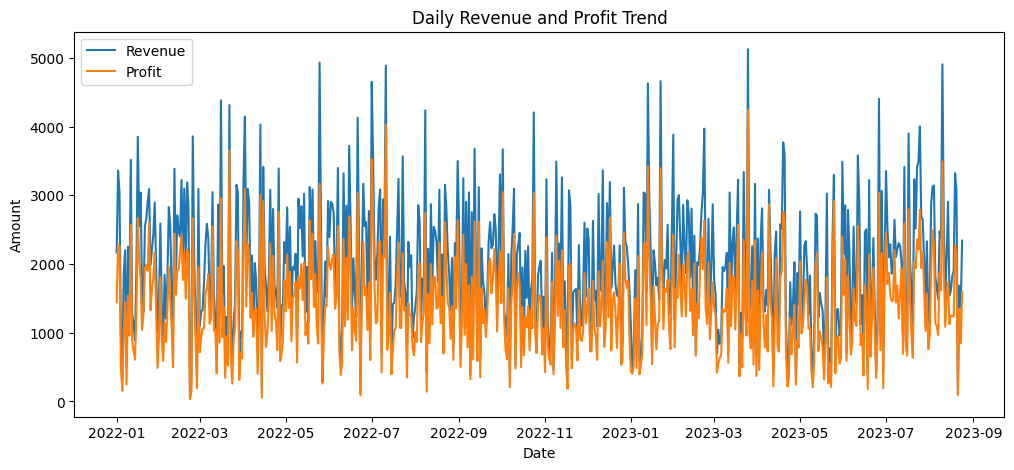

In [7]:
# Aggregate daily sales
daily = cleaned_df.groupby('date')[['revenue', 'profit']].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=daily, x='date', y='revenue', label='Revenue')
sns.lineplot(data=daily, x='date', y='profit', label='Profit')
plt.title("Daily Revenue and Profit Trend")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.legend()
plt.show()

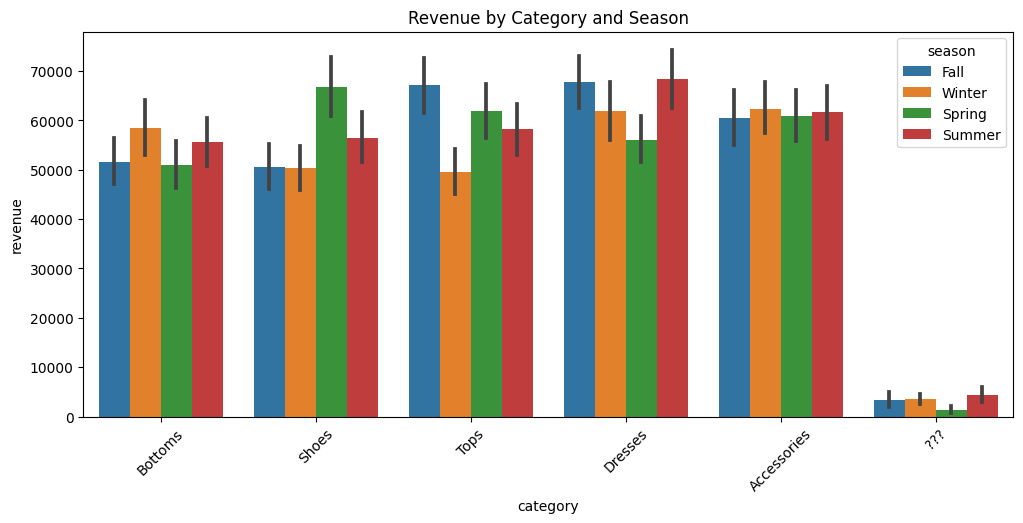

In [8]:
# Revenue by category and season
plt.figure(figsize=(12,5))
sns.barplot(data=cleaned_df, x='category', y='revenue', hue='season', estimator='sum')
plt.title("Revenue by Category and Season")
plt.xticks(rotation=45)
plt.show()

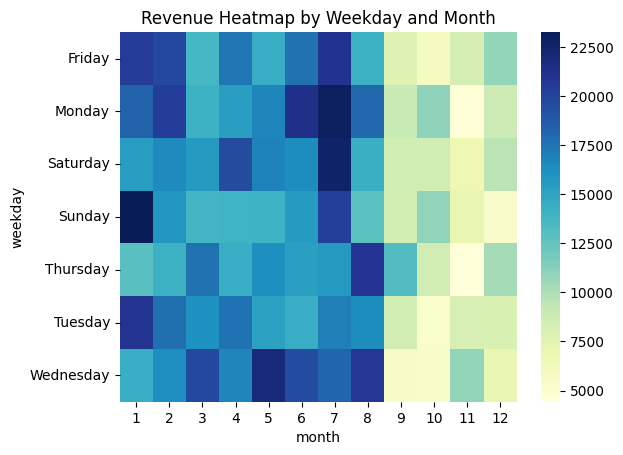

In [9]:
# Weekday and Month performance heatmap
heat = cleaned_df.groupby(['weekday','month'])['revenue'].sum().unstack()
sns.heatmap(heat, cmap='YlGnBu')
plt.title("Revenue Heatmap by Weekday and Month")
plt.show()

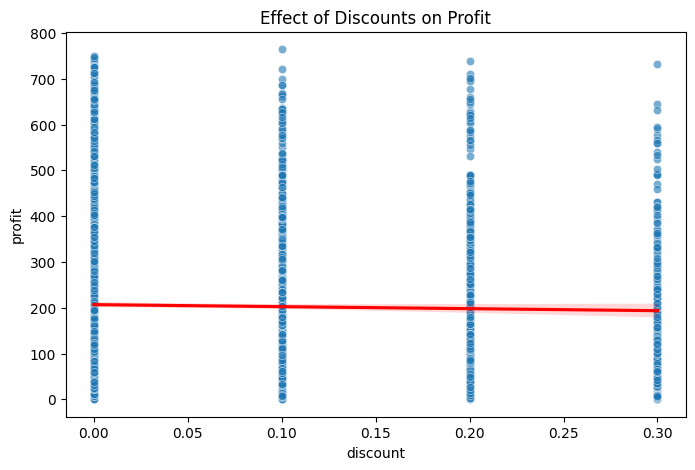

In [10]:
# Discount vs Profit relationship
plt.figure(figsize=(8,5))
sns.scatterplot(data=cleaned_df, x='discount', y='profit', alpha=0.6)
sns.regplot(data=cleaned_df, x='discount', y='profit', scatter=False, color='red')
plt.title("Effect of Discounts on Profit")
plt.show()

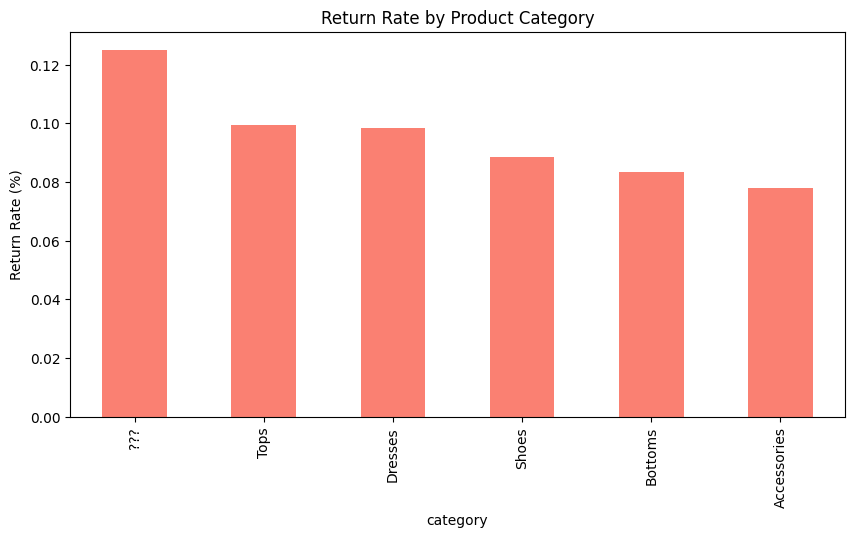

In [11]:
# Return rate by category
returns = cleaned_df.groupby('category')['returned'].mean().sort_values(ascending=False)
returns.plot(kind='bar', figsize=(10,5), color='salmon')
plt.title("Return Rate by Product Category")
plt.ylabel("Return Rate (%)")
plt.show()

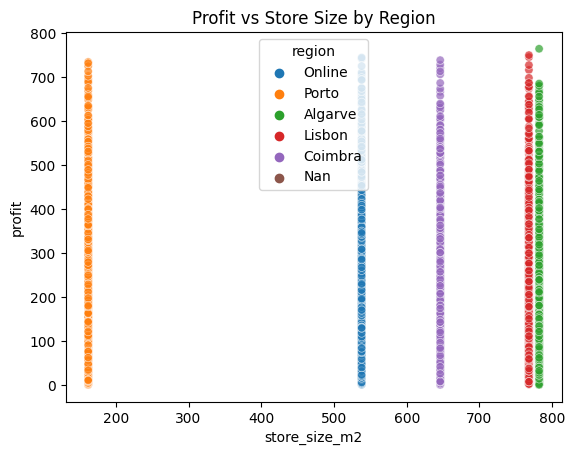

In [12]:
# Store performance by region and size
sns.scatterplot(data=cleaned_df, x='store_size_m2', y='profit', hue='region', alpha=0.7)
plt.title("Profit vs Store Size by Region")
plt.show()

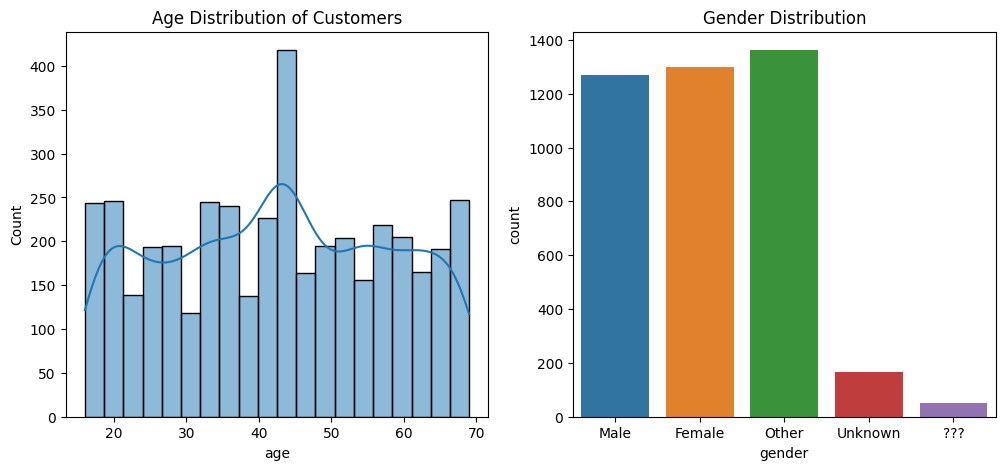

In [13]:
# Customer Demographics
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(cleaned_df['age'], bins=20, kde=True, ax=ax[0])
sns.countplot(data=cleaned_df, x='gender', ax=ax[1])
ax[0].set_title("Age Distribution of Customers")
ax[1].set_title("Gender Distribution")
plt.show()


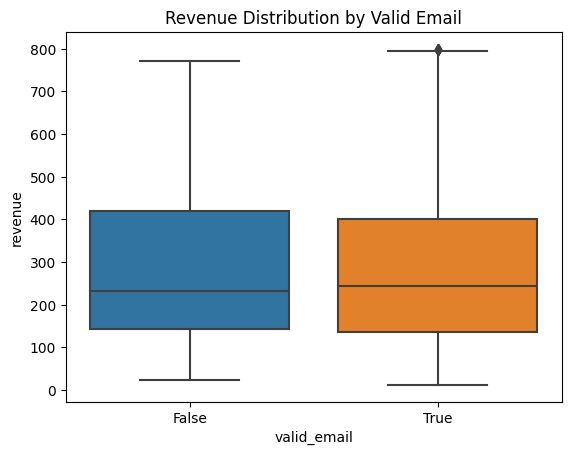

In [14]:
# Email validity vs Revemue
sns.boxplot(data=cleaned_df, x='valid_email', y='revenue')
plt.title("Revenue Distribution by Valid Email")
plt.show()

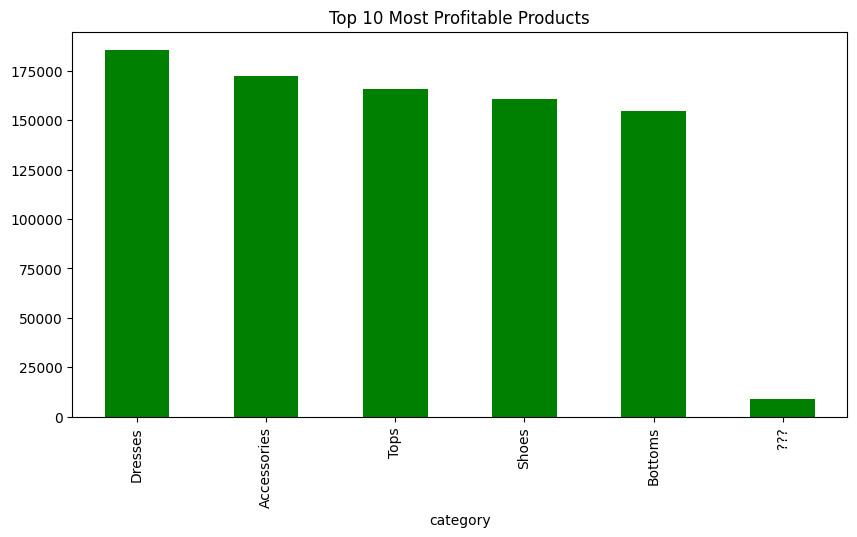

In [15]:
top_products = cleaned_df.groupby('category')['profit'].sum().nlargest(10)
top_products.plot(kind='bar', color='green', figsize=(10,5))
plt.title("Top 10 Most Profitable Products")
plt.show()
